1. collections:-
            -> It is containers that are used to store collections of data, for example list,set etc.
         
2. matplotlib.pyplot:-
            -> It is a collection of command style functions that make matplotlib work like MATLAB.
            
3. %matplotlib inline:-
            -> "%matplotlib inline" is a magic command that works best with Jupyter IPython notebook. 
            -> This command makes the image automatically shows inline inside the browser when using 
               Jupyter notebook without having to call the show ().

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans #K-Means fits a cluster
from sklearn.metrics import accuracy_score, confusion_matrix
from collections import Counter # Counter:- set the counter of collections
%matplotlib inline

In [2]:
data = pd.read_csv('iris.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
data.shape

(150, 5)

In [4]:
Counter(data.target)#0 for setosa, 1 for versicolor and 2 for virginica

Counter({0: 50, 1: 50, 2: 50})

In [5]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [6]:
X = data.iloc[:,:-1]
X.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [7]:
model = KMeans(n_clusters=3,random_state=3)#n_clusters stand for k values
model.fit(X)
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [8]:
accuracy_score(data.target,model.labels_)

0.8933333333333333

In [9]:
pd.crosstab(data.target,model.labels_)#labels gives output

col_0,0,1,2
target,,,
0,50,0,0
1,0,48,2
2,0,14,36


In [10]:
confusion_matrix(data.target,model.labels_)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

## visualization

Text(0.5, 1.0, 'This is the actual dataset')

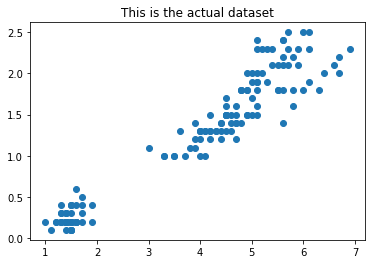

In [11]:
plt.scatter(x=data.petal_length,y=data.petal_width)
plt.title("This is the actual dataset")

In [12]:
color =np.array(['red','blue','green'])

Text(0.5, 1.0, 'This is the actual dataset')

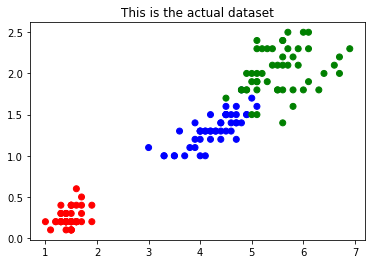

In [13]:
plt.scatter(x=data.petal_length,y=data.petal_width,c = color[data.target])
plt.title("This is the actual dataset")

Text(0.5, 1.0, 'Predicted')

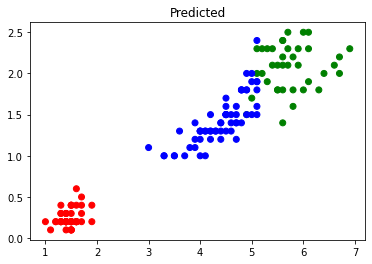

In [14]:
plt.scatter(x=data.petal_length,y=data.petal_width,c = color[model.labels_])
plt.title("Predicted")

## Elbow Technique
- to find no. of cluster hidden in data or find KMeans
- k = 1 to 17, we calculate distorsion and then we plot graph k and distorsion
- Distorsion - Avg. distance of the point to the centroid
- d decreses as the number of cluster increases

In [15]:
from scipy.spatial.distance import cdist

In [16]:
X = data.iloc[:,[2,3]]
X.head(2)

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2


In [ ]:
distortions = []
K = range(1,17)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X,kmeanModel.cluster_centers_,'euclidean'),axis=1)) / X.shape[0])


In [ ]:
X.shape[0]

In [28]:
distortions

[1.7069324035460887,
 0.5843925063315167,
 0.3692571031973975,
 0.30004621443331964,
 0.2648715425065015,
 0.23572524915215798,
 0.21134541717278874,
 0.1963339520165121,
 0.18810110384037523,
 0.17288452168939852,
 0.16286922835388654,
 0.1607193267141518,
 0.1520628500044821,
 0.14492172528570615,
 0.1386429323248621,
 0.13298864137674715]

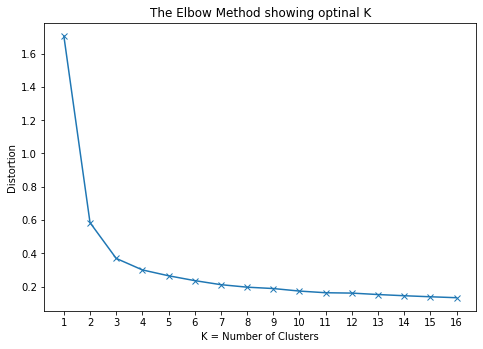

In [26]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xticks(range(1,25))
ax.set_xlabel('K = Number of Clusters')
ax.set_ylabel('Distortion')
ax.set_title('The Elbow Method showing optinal K')
ax.plot(K,distortions,marker='x')
plt.show()

In [ ]:
# in the iris dataset, elbow is clearing at K=3, thus 3 clusters